In [112]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# intialize the sclaer and encoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [113]:
#Check what feature's data we have
print(X)

     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  
3             0.1140        0.1550 

In [114]:
#Check what target's data we have
print(y)

      Rings
0        15
1         7
2         9
3        10
4         7
...     ...
4172     11
4173     10
4174      9
4175     10
4176     12

[4177 rows x 1 columns]


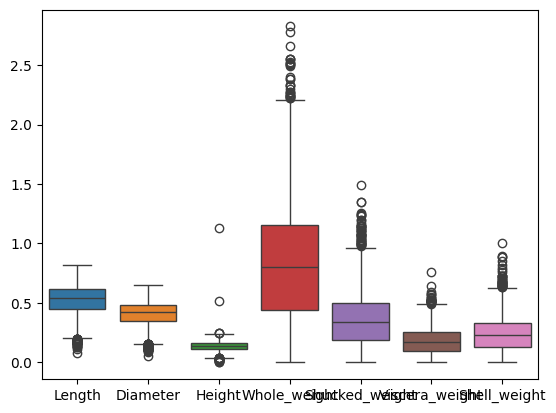

In [115]:
#plot all features to show any outliers
sns.boxplot(data=X)
plt.show()

In [116]:
#Check to see if there are any null items
X.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0


In [117]:
#Drop any duplicate row data in feature
X.drop_duplicates()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [118]:
#Check to see what are the top data for each feature
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [119]:
#Encode Sex to be use to for data manipulation
X['SexNo'] = label_encoder.fit_transform(X['Sex'])

In [120]:
#Check what feaautes we have and what each type is
X.dtypes

,0
Sex,object
Length,float64
Diameter,float64
Height,float64
Whole_weight,float64
Shucked_weight,float64
Viscera_weight,float64
Shell_weight,float64
SexNo,int64


In [121]:
#Drop any null or n/a values we have in features
X.dropna()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,SexNo
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0


In [122]:
#Check again for any null or n/a values we have in features
X.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0
SexNo,0


In [123]:
#Drop any null or n/a values we have in target
y.dropna()

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


In [124]:
#Check again for any null or n/a values we have in target
y.isnull().sum()

,0
Rings,0


In [125]:
#Drop the "Sex" feature
X = X.drop(['Sex'], axis=1)

In [126]:
#Check current info about our features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole_weight    4177 non-null   float64
 4   Shucked_weight  4177 non-null   float64
 5   Viscera_weight  4177 non-null   float64
 6   Shell_weight    4177 non-null   float64
 7   SexNo           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [127]:
#Correlate all the data from the features
correlation_matrix = X.corr().round(2)

<Axes: >

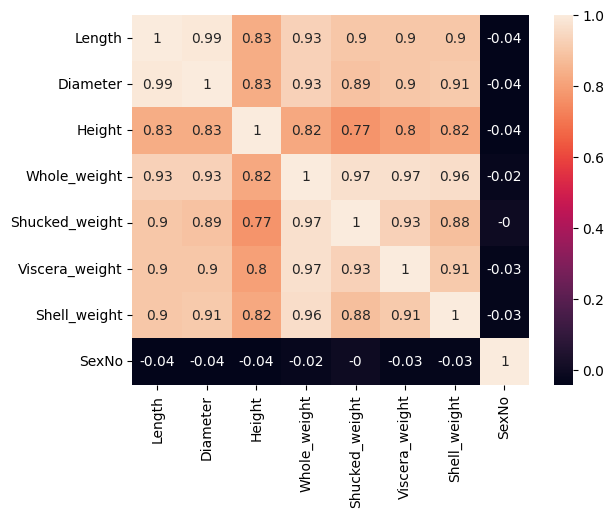

In [128]:
#Map all the correlations to visually see it
sns.heatmap(data=correlation_matrix, annot=True)

In [129]:
#Drop "SexNo" feature due to little correlation with the other data
X = X.drop(['SexNo'], axis=1)

In [130]:
#Generate colleration again with the SexNo feature removed
correlation_matrix = X.corr().round(2)

<Axes: >

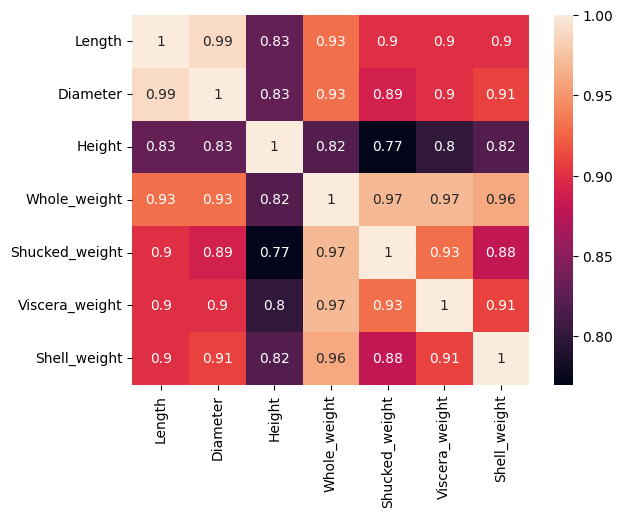

In [131]:
#Generate the visual correlization heatmap again without SexNo
sns.heatmap(data=correlation_matrix, annot=True)

In [132]:
#Standardize/Scaled our Feature's data
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
print(X)

      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell_weight  
0           0.1500

In [133]:
#Double check the feautes of X_Scaled
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   float64
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
dtypes: float64(7)
memory usage: 228.6 KB


In [134]:
#Convert our target to numpy data
y = y.to_numpy()
print(y)

[[15]
 [ 7]
 [ 9]
 ...
 [ 9]
 [10]
 [12]]


In [135]:
#Check the original X's statistical data
X.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [136]:
#Double check our X_scaled statistical data to compare with the original X's statistical data
X_scaled.describe()


,0,1,2,3,4,5,6
count,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03
mean,-5.834718e-16,-3.027929e-16,3.912493e-16,9.185853e-17,-1.020650e-17,2.704723e-16,2.976897e-16
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00
min,-3.739154e+00,-3.556267e+00,-3.335953e+00,-1.686092e+00,-1.614731e+00,-1.643173e+00,-1.705134e+00
25%,-6.161975e-01,-5.833158e-01,-5.862075e-01,-7.897577e-01,-7.811585e-01,-7.946415e-01,-7.819095e-01
50%,1.749513e-01,1.725193e-01,1.156329e-02,-5.963767e-02,-1.052891e-01,-8.753202e-02,-3.470794e-02
75%,7.579031e-01,7.267984e-01,6.093341e-01,6.613049e-01,6.426730e-01,6.606355e-01,6.478319e-01
max,2.423480e+00,2.440025e+00,2.368329e+01,4.072271e+00,5.085388e+00,5.286500e+00,5.504642e+00


In [137]:
#Made sure that y is just one array
y = y.ravel()

In [138]:
#Split our preprocessed data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

In [139]:
#Double check our training and testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3341, 7)
(836, 7)
(3341,)
(836,)


In [140]:
#Set values to our hyper-parameters so we can change easily
etaVar = 0.01
maxIterVar = 100000
tolVar = 0.0001
learningRateVar = "invscaling"

In [141]:
#Use SGDRegressor to run our ML Regression data
model = SGDRegressor(eta0 = etaVar, max_iter = maxIterVar, tol = tolVar, learning_rate = learningRateVar, loss='squared_error', penalty='l2')
model.fit(X_train, y_train)

SGDRegressor(max_iter=100000, tol=0.0001)

In [142]:
#Try to find our weights for our linear equation
model.coef_

array([-0.20331474,  1.03970144,  0.97357213,  2.63771816, -3.58834358,
       -0.71476321,  1.80583638])

In [143]:
#Find our y-intercenpt
model.intercept_

array([9.96977666])

In [144]:
#Calculate our MSE, MAE, EV, and R2
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [145]:
#Print those evalulation metrics
print(mse)
print(mae)
print(ev)
print(r2)

5.037904532667377
1.5975980572264703
0.4903043059907791
0.48828357107101483


In [146]:
#Get a full generation of all the statistics in a summary chart
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.046
Model:                            OLS   Adj. R-squared (uncentered):              0.044
Method:                 Least Squares   F-statistic:                              23.18
Date:                Sun, 08 Sep 2024   Prob (F-statistic):                    6.39e-31
Time:                        21:13:42   Log-Likelihood:                         -12501.
No. Observations:                3341   AIC:                                  2.502e+04
Df Residuals:                    3334   BIC:                                  2.506e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------